<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/10_02_kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/lmcanavals/algorithmic_complexity.git

In [1]:
import util
import disjointset as ds
import graph_algorithms as ga

In [3]:
#basedir="algorithmic_complexity/"
basedir="./"

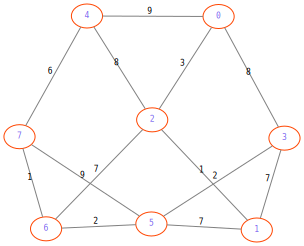

In [4]:
G, _ = util.readAdjl(f"{basedir}small.wal", weighted=True)
util.adjlShow(G, weighted=True)

In [6]:
import heapq as hq
def kruskal(G):
  n = len(G)
  edges = []
  for u in range(n):
    for v, w in G[u]:
      hq.heappush(edges, (w, u, v))

  uf = ds.DisjointSet(n)

  T = []
  while edges and n > 0:
    w, u, v = hq.heappop(edges)
    if not uf.sameset(u, v):
      uf.union(u, v)
      T.append((u, v, w))
      n -= 1

  return T

In [7]:
T = kruskal(G)
print(T)

[(1, 2, 1), (6, 7, 1), (3, 5, 2), (5, 6, 2), (0, 2, 3), (4, 7, 6), (1, 3, 7)]


In [9]:
n = len(G)
Gp = [[] for _ in range(n)]
for u, v, _ in T:
  Gp[u].append(v)
  Gp[v].append(u)

[None, 2, 0, 1, 7, 3, 5, 6]


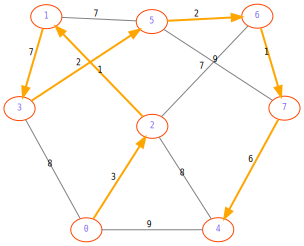

In [10]:
path = ga.bfs(Gp, 0)
print(path)
util.adjlShow(G, weighted=True, path=path)